In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [8]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
print(X)
print(y)

[[ 0.95219249 -0.60923137]
 [ 1.65952714 -0.31381256]
 [ 0.526137   -0.94160831]
 [-1.41959667  0.96995176]
 [-0.94002647 -0.78014296]
 [-1.60724319  0.81552503]
 [-0.82564969  0.8724172 ]
 [ 0.88319833 -1.0467727 ]
 [ 1.72626083 -1.10110012]
 [ 1.42796744 -1.36373081]
 [-0.91416557 -1.16086389]
 [-0.61034703 -0.93588251]
 [-1.58604649  1.14537822]
 [-0.44909701  0.94272961]
 [-0.59427845 -1.68359671]
 [ 0.28538926 -1.0609578 ]
 [ 1.63020037 -0.86777469]
 [ 1.74338976 -0.9765849 ]
 [ 1.02112227 -1.64830079]
 [-1.40786203  1.06717692]
 [ 0.73537974 -1.37188465]
 [-0.53991778  0.49305918]
 [-0.83445477 -0.98106325]
 [ 0.80705387 -0.56808146]
 [-1.16056577 -0.73060349]
 [ 0.67184979 -1.2490654 ]
 [-0.25482897  1.3340235 ]
 [-0.8742912   0.46949382]
 [ 1.57943063 -0.64311997]
 [-0.83355047 -1.05312047]
 [-1.17586888 -0.56471181]
 [-1.15029996  0.44811001]
 [-1.50155227  0.7448994 ]
 [ 1.27281391 -0.88137737]
 [-1.03947388 -1.08599322]
 [-0.59490438  1.11149634]
 [ 0.51922533 -1.18831422]
 

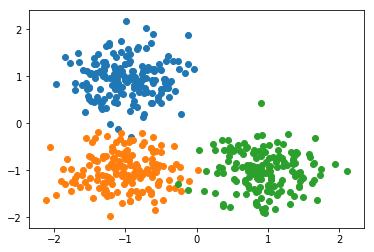

In [10]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [12]:
print(y) 
y_cat = to_categorical(y, 3)
print(y_cat)

[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0 2 2 1 0 1 2 0 2 0 2 

In [13]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 441us/step - loss: 0.8374 - acc: 0.6300
Epoch 2/100
500/500 [==============================] - 0s 35us/step - loss: 0.2471 - acc: 0.9860
Epoch 3/100
500/500 [==============================] - 0s 37us/step - loss: 0.1224 - acc: 0.9900
Epoch 4/100
500/500 [==============================] - 0s 27us/step - loss: 0.0897 - acc: 0.9900
Epoch 5/100
500/500 [==============================] - 0s 27us/step - loss: 0.0744 - acc: 0.9900
Epoch 6/100
500/500 [==============================] - 0s 33us/step - loss: 0.0667 - acc: 0.9900
Epoch 7/100
500/500 [==============================] - 0s 31us/step - loss: 0.0617 - acc: 0.9880
Epoch 8/100
500/500 [==============================] - 0s 31us/step - loss: 0.0580 - acc: 0.9900
Epoch 9/100
500/500 [==============================] - 0s 63us/step - loss: 0.0552 - acc: 0.9880
Epoch 10/100
500/500 [==============================] - 0s 38us/step - loss: 0.0524 - acc: 0.9900
Epoch 11/100
500/500 [======

500/500 [==============================] - 0s 24us/step - loss: 0.0271 - acc: 0.9900
Epoch 85/100
500/500 [==============================] - 0s 24us/step - loss: 0.0269 - acc: 0.9880
Epoch 86/100
500/500 [==============================] - 0s 22us/step - loss: 0.0267 - acc: 0.9900
Epoch 87/100
500/500 [==============================] - 0s 27us/step - loss: 0.0264 - acc: 0.9900
Epoch 88/100
500/500 [==============================] - 0s 19us/step - loss: 0.0266 - acc: 0.9900
Epoch 89/100
500/500 [==============================] - 0s 22us/step - loss: 0.0261 - acc: 0.9900
Epoch 90/100
500/500 [==============================] - 0s 27us/step - loss: 0.0261 - acc: 0.9900
Epoch 91/100
500/500 [==============================] - 0s 18us/step - loss: 0.0258 - acc: 0.9900
Epoch 92/100
500/500 [==============================] - 0s 26us/step - loss: 0.0259 - acc: 0.9900
Epoch 93/100
500/500 [==============================] - 0s 22us/step - loss: 0.0261 - acc: 0.9900
Epoch 94/100
500/500 [===========